# Tutorial 8: Model Tuning

## A. Selecting Hyper Parameters

In [1]:
!pip install flair

In [2]:
from flair.datasets import TREC_6

# load your corpus
corpus = TREC_6()

2019-12-20 15:51:39,750 https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label not found in cache, downloading to /tmp/tmpobajxg1a


100%|██████████| 335858/335858 [00:00<00:00, 364601.26B/s]

2019-12-20 15:51:41,429 copying /tmp/tmpobajxg1a to cache at /root/.flair/datasets/trec_6/original/train_5500.label
2019-12-20 15:51:41,430 removing temp file /tmp/tmpobajxg1a


2019-12-20 15:51:42,185 https://cogcomp.seas.upenn.edu/Data/QA/QC/TREC_10.label not found in cache, downloading to /tmp/tmpejrvyvrw


100%|██████████| 23354/23354 [00:00<00:00, 125197.82B/s]

2019-12-20 15:51:43,142 copying /tmp/tmpejrvyvrw to cache at /root/.flair/datasets/trec_6/original/TREC_10.label
2019-12-20 15:51:43,144 removing temp file /tmp/tmpejrvyvrw


2019-12-20 15:51:43,167 Reading data from /root/.flair/datasets/trec_6
2019-12-20 15:51:43,168 Train: /root/.flair/datasets/trec_6/train.txt
2019-12-20 15:51:43,169 Dev: None
2019-12-20 15:51:43,170 Test: /root/.flair/datasets/trec_6/test.txt


In [0]:
from flair.embeddings import FlairEmbeddings, WordEmbeddings

In [5]:
from hyperopt import hp
from flair.hyperparameter.param_selection import SearchSpace, Parameter

# define your search space
search_space = SearchSpace()
search_space.add(Parameter.EMBEDDINGS, hp.choice,
                 options = [
                            [ WordEmbeddings('en') ],
                            [ FlairEmbeddings('news-forward'),
                              FlairEmbeddings('news-backward') ]
                 ])

search_space.add(Parameter.HIDDEN_SIZE, hp.choice, options = [32, 64, 128])
search_space.add(Parameter.RNN_LAYERS, hp.choice, options = [1, 2])
search_space.add(Parameter.DROPOUT, hp.uniform, low = 0.0, high = 0.5)
search_space.add(Parameter.LEARNING_RATE, hp.choice, 
                 options = [0.05, 0.1, 0.15, 0.2])
search_space.add(Parameter.MINI_BATCH_SIZE, hp.choice, 
                 options = [8, 16, 32])

2019-12-20 15:57:01,002 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.3/en-fasttext-news-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmpqq56fojp


100%|██████████| 1200000128/1200000128 [01:50<00:00, 10852034.72B/s]

2019-12-20 15:58:52,820 copying /tmp/tmpqq56fojp to cache at /root/.flair/embeddings/en-fasttext-news-300d-1M.vectors.npy


2019-12-20 15:58:57,174 removing temp file /tmp/tmpqq56fojp
2019-12-20 15:58:58,461 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.3/en-fasttext-news-300d-1M not found in cache, downloading to /tmp/tmp7hy_s6ft


100%|██████████| 54600983/54600983 [00:07<00:00, 7681124.59B/s] 

2019-12-20 15:59:06,704 copying /tmp/tmp7hy_s6ft to cache at /root/.flair/embeddings/en-fasttext-news-300d-1M
2019-12-20 15:59:06,772 removing temp file /tmp/tmp7hy_s6ft



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


2019-12-20 15:59:12,962 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-forward--h2048-l1-d0.05-lr30-0.25-20/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmphznnxrv3


100%|██████████| 73034624/73034624 [00:09<00:00, 8000063.50B/s]

2019-12-20 15:59:23,216 copying /tmp/tmphznnxrv3 to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2019-12-20 15:59:23,314 removing temp file /tmp/tmphznnxrv3
2019-12-20 15:59:34,651 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-backward--h2048-l1-d0.05-lr30-0.25-20/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmpqjilu47e


100%|██████████| 73034575/73034575 [00:08<00:00, 8376182.60B/s] 

2019-12-20 15:59:44,520 copying /tmp/tmpqjilu47e to cache at /root/.flair/embeddings/news-backward-0.4.1.pt
2019-12-20 15:59:44,637 removing temp file /tmp/tmpqjilu47e


In [0]:
# search_space.add(Parameter.EMBEDDINGS, hp.choice,
#                  options = [
#                             [ FlairEmbeddings('news-forward'),
#                               FlairEmbeddings('news-backward') ]
#                  ])

In [9]:
from flair.hyperparameter.param_selection import TextClassifierParamSelector
from flair.hyperparameter.param_selection import OptimizationValue

# create the parameter selector
param_selector = TextClassifierParamSelector(
    corpus,
    False,
    'resources/results',
    'lstm',
    max_epochs = 50,
    training_runs = 3,
    optimization_value = OptimizationValue.DEV_SCORE
)

# start the optimization
param_selector.optimize(search_space, max_evals = 100)

2019-12-20 16:07:23,280 Computing label dictionary. Progress:


100%|██████████| 4907/4907 [00:00<00:00, 162015.29it/s]

2019-12-20 16:07:23,315 [b'LOC', b'ENTY', b'DESC', b'NUM', b'ABBR', b'HUM']
  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]2019-12-20 16:07:23,333 ----------------------------------------------------------------------------------------------------
2019-12-20 16:07:23,336 Evaluation run: 1
2019-12-20 16:07:23,337 Evaluating parameter combination:
2019-12-20 16:07:23,339 	dropout: 0.4768923447560231
2019-12-20 16:07:23,341 	embeddings: /root/.flair/embeddings/news-forward-0.4.1.pt,/root/.flair/embeddings/news-backward-0.4.1.pt
2019-12-20 16:07:23,343 	hidden_size: 128
2019-12-20 16:07:23,344 	learning_rate: 0.1
2019-12-20 16:07:23,346 	mini_batch_size: 16
2019-12-20 16:07:23,347 	rnn_layers: 2
2019-12-20 16:07:23,349 ----------------------------------------------------------------------------------------------------
2019-12-20 16:07:23,413 ----------------------------------------------------------------------------------------------------
2019-12-20 16:07:23,414 Training run: 1


2019-12-20 16:07:23,696 ----------------------------------------------------------------------------------------------------
2019-12-20 16:07:23,698 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=4096, out_features=4096, bias=True)
    (rnn): GRU(4096, 128, num_layers=2, batch_first=True)
    (dropout): Dro

RuntimeError: ignored

## B. Finding the best Learning Rate

In [0]:
from flair.datasets import WNUT_17
from flair.embeddings import TokenEmbeddings, WordEmbeddings
from flair.embeddings import StackedEmbeddings
from flair.trainers import ModelTrainer
from typing import List

In [11]:
# 1. get the corpus
corpus = WNUT_17().downsample(0.1)
print(corpus)

2019-12-20 17:34:08,014 https://noisy-text.github.io/2017/files/wnut17train.conll not found in cache, downloading to /tmp/tmppzg5kg_1


100%|██████████| 493781/493781 [00:00<00:00, 6039524.27B/s]

2019-12-20 17:34:08,175 copying /tmp/tmppzg5kg_1 to cache at /root/.flair/datasets/wnut_17/wnut17train.conll
2019-12-20 17:34:08,178 removing temp file /tmp/tmppzg5kg_1


2019-12-20 17:34:09,051 https://noisy-text.github.io/2017/files/emerging.dev.conll not found in cache, downloading to /tmp/tmp2xzqn4_4


100%|██████████| 114752/114752 [00:00<00:00, 3079877.48B/s]

2019-12-20 17:34:09,159 copying /tmp/tmp2xzqn4_4 to cache at /root/.flair/datasets/wnut_17/emerging.dev.conll
2019-12-20 17:34:09,161 removing temp file /tmp/tmp2xzqn4_4


2019-12-20 17:34:10,108 https://noisy-text.github.io/2017/files/emerging.test.annotated not found in cache, downloading to /tmp/tmpnsv8vx_6


100%|██████████| 192425/192425 [00:00<00:00, 4581021.49B/s]

2019-12-20 17:34:10,222 copying /tmp/tmpnsv8vx_6 to cache at /root/.flair/datasets/wnut_17/emerging.test.annotated
2019-12-20 17:34:10,224 removing temp file /tmp/tmpnsv8vx_6
2019-12-20 17:34:10,227 Reading data from /root/.flair/datasets/wnut_17
2019-12-20 17:34:10,228 Train: /root/.flair/datasets/wnut_17/wnut17train.conll
2019-12-20 17:34:10,230 Dev: /root/.flair/datasets/wnut_17/emerging.dev.conll
2019-12-20 17:34:10,232 Test: /root/.flair/datasets/wnut_17/emerging.test.annotated


Corpus: 339 train + 101 dev + 129 test sentences


In [12]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type = tag_type)
print(tag_dictionary.idx2item)

[b'<unk>', b'O', b'B-person', b'E-person', b'S-person', b'S-corporation', b'B-location', b'I-location', b'E-location', b'S-location', b'B-product', b'E-product', b'I-product', b'B-creative-work', b'E-creative-work', b'S-product', b'S-group', b'I-person', b'B-group', b'I-group', b'E-group', b'B-corporation', b'I-corporation', b'E-corporation', b'I-creative-work', b'S-creative-work', b'<START>', b'<STOP>']


In [13]:
# 4. initialize embeddings
embedding_types: List[TokenEmbeddings] = [
                  WordEmbeddings('glove'),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings = embedding_types)

2019-12-20 17:39:02,522 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmp38kjnv8s


100%|██████████| 160000128/160000128 [00:17<00:00, 9161027.43B/s] 

2019-12-20 17:39:21,121 copying /tmp/tmp38kjnv8s to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2019-12-20 17:39:21,459 removing temp file /tmp/tmp38kjnv8s
2019-12-20 17:39:22,737 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim not found in cache, downloading to /tmp/tmp6sfvgona


100%|██████████| 21494764/21494764 [00:04<00:00, 4308676.92B/s]

2019-12-20 17:39:28,875 copying /tmp/tmp6sfvgona to cache at /root/.flair/embeddings/glove.gensim
2019-12-20 17:39:28,902 removing temp file /tmp/tmp6sfvgona


In [0]:
# 5. initialize sequence tagger
from flair.models import SequenceTagger

tagger: SequenceTagger = SequenceTagger(hidden_size = 256,
                                        embeddings = embeddings,
                                        tag_dictionary = tag_dictionary,
                                        tag_type = tag_type,
                                        use_crf = True)

In [0]:
# 6. initialize trainer

trainer: ModelTrainer = ModelTrainer(tagger, corpus)

In [16]:
# 7. find learning rate

learning_rate_tsv = trainer.find_learning_rate('resources/taggers/example-ner',
                                               'learning_rate.tsv')

[1.4454397707459274e-07]
[1.7378008287493754e-07]
[2.0892961308540395e-07]
[2.51188643150958e-07]
[3.019951720402016e-07]
[3.6307805477010137e-07]
[4.36515832240166e-07]
[5.248074602497725e-07]
[6.309573444801933e-07]
[7.585775750291837e-07]
[9.120108393559096e-07]
[1.096478196143185e-06]
[1.3182567385564074e-06]
[1.5848931924611132e-06]
[1.9054607179632473e-06]
[2.2908676527677735e-06]
[2.754228703338166e-06]
[3.311311214825911e-06]
[3.981071705534973e-06]
[4.7863009232263826e-06]
[5.754399373371569e-06]
[6.918309709189365e-06]
[8.317637711026708e-06]
[9.999999999999999e-06]
[1.202264434617413e-05]
[1.4454397707459279e-05]
[1.737800828749376e-05]
[2.0892961308540385e-05]
[2.5118864315095795e-05]
[3.019951720402016e-05]
[3.630780547701014e-05]
[4.365158322401661e-05]
[5.248074602497728e-05]
[6.309573444801929e-05]
[7.585775750291836e-05]
[9.120108393559096e-05]
[0.00010964781961431851]
[0.00013182567385564074]
[0.0001584893192461114]
[0.00019054607179632462]
[0.00022908676527677726]
[0

Learning_rate plots are saved in resources/taggers/example-ner/learning_rate.png


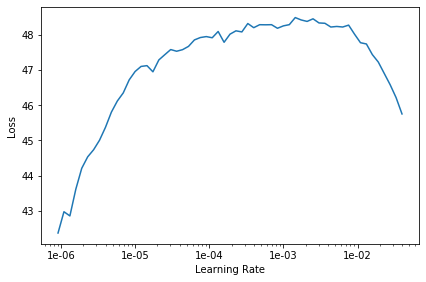

In [17]:
# 8. plot the learning rate finder curve
from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_learning_rate(learning_rate_tsv)

## C. Custom Optimizers

In [18]:
from torch.optim.adam import Adam

trainer = ModelTrainer(tagger, corpus,
                       optimizer = Adam)

trainer.train(
    "resources/taggers/example",
    weight_decay = 1e-4
)

2019-12-20 17:52:43,513 ----------------------------------------------------------------------------------------------------
2019-12-20 17:52:43,520 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=28, bias=True)
)"
2019-12-20 17:52:43,525 ----------------------------------------------------------------------------------------------------
2019-12-20 17:52:43,530 Corpus: "Corpus: 339 train + 101 dev + 129 test sentences"
2019-12-20 17:52:43,531 ----------------------------------------------------------------------------------------------------
2019-12-20 17:52:43,533 Parameters:
2019-12-20 17:52:43,537  - learning_rate: "0.1"
2019-12-20 17:52:43,540  - mini_batch_size: 

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type StackedEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type WordEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


2019-12-20 17:52:49,113 ----------------------------------------------------------------------------------------------------
2019-12-20 17:52:49,265 epoch 2 - iter 0/11 - loss 71.28720856 - samples/sec: 214.97
2019-12-20 17:52:49,420 epoch 2 - iter 1/11 - loss 57.91867828 - samples/sec: 229.32
2019-12-20 17:52:49,594 epoch 2 - iter 2/11 - loss 60.36667124 - samples/sec: 201.90
2019-12-20 17:52:49,744 epoch 2 - iter 3/11 - loss 73.01189232 - samples/sec: 236.88
2019-12-20 17:52:49,890 epoch 2 - iter 4/11 - loss 72.90306854 - samples/sec: 246.21
2019-12-20 17:52:50,041 epoch 2 - iter 5/11 - loss 70.16939926 - samples/sec: 235.90
2019-12-20 17:52:50,199 epoch 2 - iter 6/11 - loss 65.45948900 - samples/sec: 222.96
2019-12-20 17:52:50,364 epoch 2 - iter 7/11 - loss 63.99839211 - samples/sec: 214.12
2019-12-20 17:52:50,521 epoch 2 - iter 8/11 - loss 60.38916058 - samples/sec: 225.03
2019-12-20 17:52:50,686 epoch 2 - iter 9/11 - loss 57.70584526 - samples/sec: 212.56
2019-12-20 17:52:50,823 e

{'test_score': 0.0555,
 'dev_score_history': [0.0,
  0.0,
  0.0222,
  0.087,
  0.0,
  0.0,
  0.0435,
  0.0,
  0.0227,
  0.198,
  0.0861,
  0.0225,
  0.1781,
  0.1601,
  0.044,
  0.0222,
  0.044,
  0.0227,
  0.1031,
  0.044,
  0.0435,
  0.066,
  0.1076,
  0.0645,
  0.0435,
  0.044,
  0.0851,
  0.0435,
  0.0435,
  0.0445,
  0.0445,
  0.0445,
  0.0435,
  0.0435,
  0.0435,
  0.0435,
  0.0435,
  0.0435,
  0.0435,
  0.0435,
  0.0435,
  0.0435,
  0.0435,
  0.0435,
  0.0435,
  0.0435],
 'train_loss_history': [291.8794259158048,
  56.981740431352094,
  25.556164134632457,
  17.408550999381326,
  16.602836175398394,
  15.876086841930043,
  15.072928255254572,
  15.277334560047496,
  13.274605881084096,
  12.563690879128195,
  11.062905550003052,
  10.731114040721547,
  10.586729309775613,
  10.247884663668545,
  9.8503380688754,
  9.109914389523594,
  8.579352942380039,
  9.065854462710293,
  7.417437314987183,
  7.798665350133723,
  7.025214542042125,
  6.697624119845304,
  6.616952679374001,
 